In [2]:

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


In [3]:
sns.set_theme()

In [4]:
from scipy.io import loadmat

In [7]:
loadmat('matlab/LS_20_1000_32.mat')['calculated_t1']

array([[ 972.03465592, 1031.674849  , 1045.13495679,  970.32669061,
         979.08152342,  992.65008329, 1063.05025596, 1020.18559702,
        1051.79426991, 1039.22046169,  989.68491475,  959.0590873 ,
         975.70451658, 1026.7249772 , 1024.97131915, 1036.183906  ,
        1010.70310684,  928.83827991,  933.46561205,  949.21764967,
         948.41972412, 1007.81241283,  998.89194685,  956.70556014,
        1043.97717677,  975.49664799, 1047.73958227,  969.98788186,
         992.35089043,  945.56909703,  955.9938528 ,  992.56967907]])

FileNotFoundError: [Errno 2] No such file or directory: 'metric_1200_2_20_800_LS_only.npy'

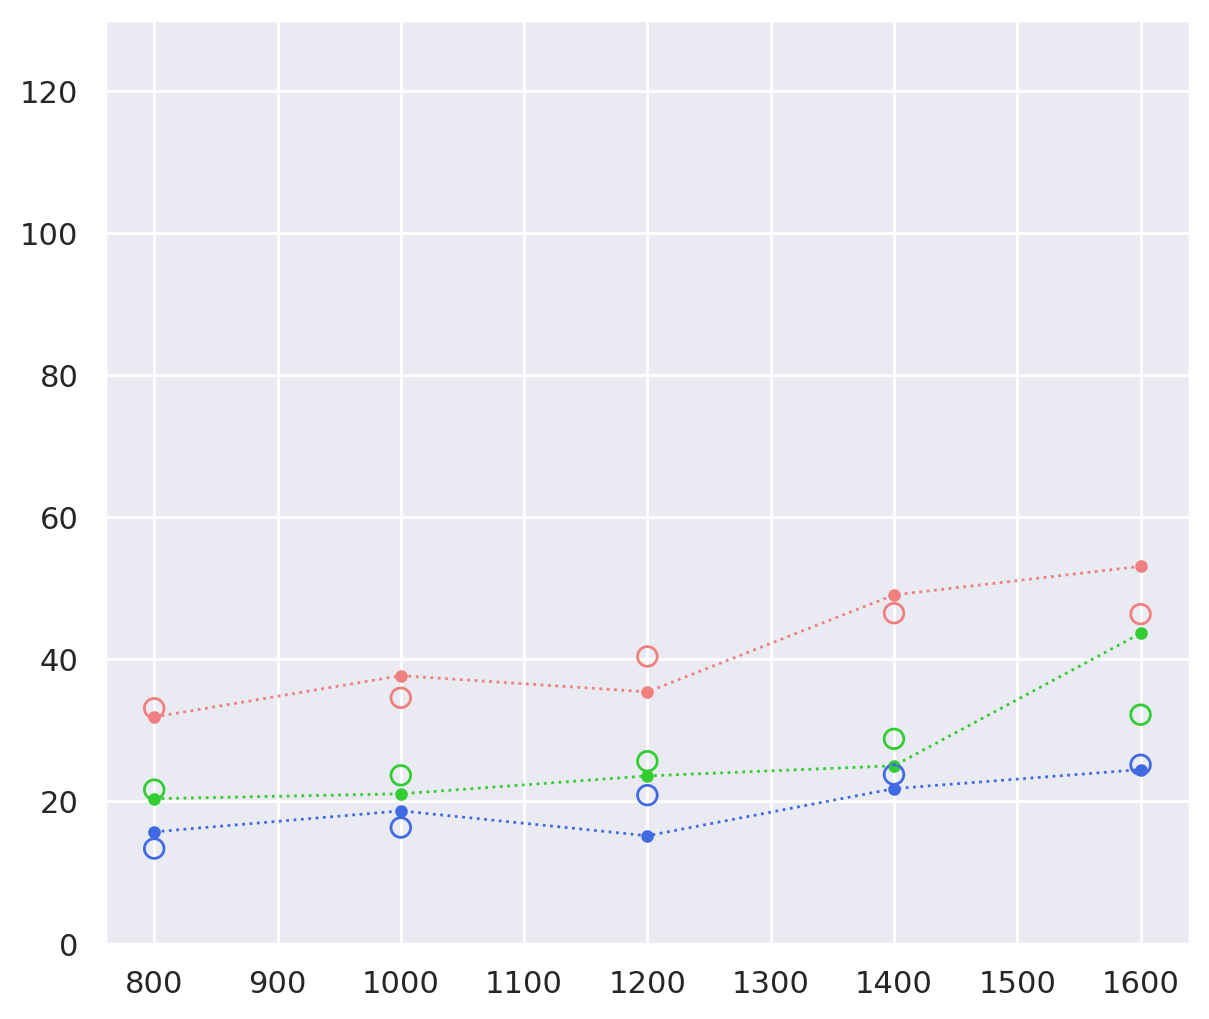

In [12]:
import matplotlib.lines as mlines
fig= plt.figure(figsize=(7,6), dpi = 200, )
ax = plt.gca()
#ax.set_xscale('log', base=2)
colors = ['lightcoral','limegreen','royalblue','orange']
markers = ['.','o','s','^']
labels = ['Measured','Calculated', "Bayes t", "Bayes Gauss"]
T1 = [800, 1000, 1200, 1400, 1600]
SNR = [20,30,40]
method = ['Robust LS', 'LS']
plt.xlim()
plt.ylim(0,130)

for k in T1:
    for j_n, j in enumerate(SNR):
        T1_estimate= loadmat(f'matlab/LS_{j}_{k}_32.mat')['calculated_t1']
        T1_sd_estimate= loadmat(f'matlab/LS_{j}_{k}_32.mat')['calculated_sd']
        y = [T1_estimate.std(),T1_sd_estimate.mean()]
        x = [k]*len(y)
        for i in range(len(x)):
            if i== 0:
                plt.scatter(x[i],y[i],s = 50,marker = markers[i],color = colors[j_n], label = labels[i], alpha = 1)
            else: 
                plt.scatter(x[i],y[i],s = 50,marker = markers[i],color = colors[j_n], label = labels[i], alpha = 1, facecolor="None")

for i in range(1):
    for j_n, j in enumerate(SNR):
        current_line_points = []
        for k in T1:
            T1_estimate= loadmat(f'matlab/LS_{j}_{k}_32.mat')['calculated_t1']
            T1_sd_estimate= loadmat(f'matlab/LS_{j}_{k}_32.mat')['calculated_sd']
            y = [T1_estimate.std(),T1_sd_estimate.mean()]

            current_line_points.append(y[i])
        
        plt.plot(T1, current_line_points, lw = 1, color = colors[j_n],linestyle = 'dotted')

for k in T1:
    for j_n, j in enumerate(SNR):
        T1_estimate, T1_sd_estimate, T1_sd_raw_estimate= np.load(f'metric_1200_2_{j}_{k}_LS_only.npy', allow_pickle = True).item().values()
        y = [T1_estimate.std(),T1_sd_estimate.mean()]
        x = [k]*len(y)
        for i in range(len(x)):
            if i== 0:
                plt.scatter(x[i],y[i],s = 50,marker = markers[i],color = colors[j_n+1], label = labels[i], alpha = 1)
            else: 
                plt.scatter(x[i],y[i],s = 50,marker = markers[i],color = colors[j_n+1], label = labels[i], alpha = 1, facecolor="None")
                
for i in range(1):
    for j_n, j in enumerate(SNR):
        current_line_points = []
        for k in T1:
            T1_estimate, T1_sd_estimate, T1_sd_raw_estimate= np.load(f'metric_1200_2_{j}_{k}_LS_only.npy', allow_pickle = True).item().values()
            y = [T1_estimate.std(),T1_sd_estimate.mean()]

            current_line_points.append(y[i])
        
        plt.plot(T1, current_line_points, lw = 1, color = colors[j_n+1],linestyle = 'dotted')








legend_lines_2 = []
for i in range(len(method)):
    legend_lines_2.append(mlines.Line2D([], [], color=colors[i], 
                             label=method[i],lw = 1))           


legend_1= plt.legend(handles = legend_lines_2, loc = (0.013,0.66))


legend_lines = []
for i in range(2):
    legend_lines.append(mlines.Line2D([], [], color='b', marker=markers[i],
                            markersize=6, label=labels[i],lw = 0))                      
ax.legend(handles=legend_lines, loc = (0.013, 0.78))


plt.gca().add_artist(legend_1)

plt.xlabel('Number of Trials')
plt.ylabel('T1 SD estimates (ms)')

Text(0, 0.5, 'T1 SD estimates (ms)')

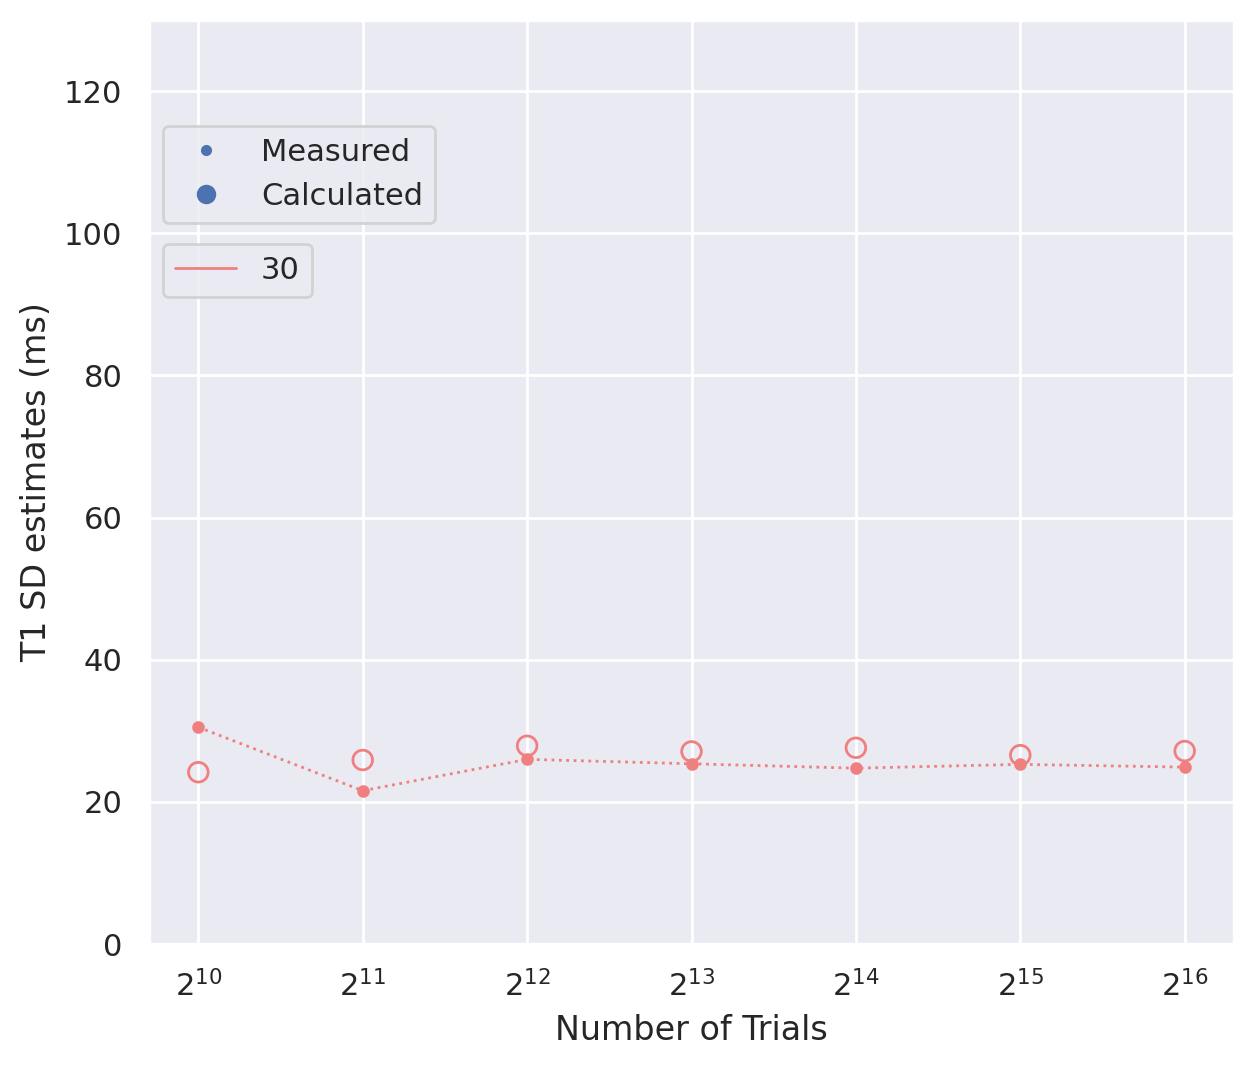

In [20]:
import matplotlib.lines as mlines
fig= plt.figure(figsize=(7,6), dpi = 200, )
ax = plt.gca()
ax.set_xscale('log', base=2)
colors = ['lightcoral','limegreen','royalblue','orange']
markers = ['.','o','s','^']
labels = ['Measured','Calculated', "Bayes t", "Bayes Gauss"]
n_trials = [1024, 2048, 4096, 8192 ,16384, 32768, 65536]
SNR = [ 30]
plt.xlim()
plt.ylim(0,130)
for k in n_trials:
    for j_n, j in enumerate(SNR):
        T1_estimate, T1_sd_estimate, T1_sd_raw_estimate= np.load(f'metric_1200_2_{j}_{k}_LS_only.npy', allow_pickle = True).item().values()
        y = [T1_estimate.std(),T1_sd_estimate.mean()]
        x = [k]*len(y)
        for i in range(len(x)):
            if i== 0:
                plt.scatter(x[i],y[i],s = 50,marker = markers[i],color = colors[j_n], label = labels[i], alpha = 1)
            else: 
                plt.scatter(x[i],y[i],s = 50,marker = markers[i],color = colors[j_n], label = labels[i], alpha = 1, facecolor="None")
                
for i in range(1):
    for j_n, j in enumerate(SNR):
        current_line_points = []
        for k in n_trials:
            T1_estimate, T1_sd_estimate, T1_sd_raw_estimate= np.load(f'metric_1200_2_{j}_{k}_LS_only.npy', allow_pickle = True).item().values()
            y = [T1_estimate.std(),T1_sd_estimate.mean()]

            current_line_points.append(y[i])
        
        plt.plot(n_trials, current_line_points, lw = 1, color = colors[j_n],linestyle = 'dotted')


legend_lines_2 = []
for i in range(len(SNR)):
    legend_lines_2.append(mlines.Line2D([], [], color=colors[i], 
                             label=SNR[i],lw = 1))           


legend_1= plt.legend(handles = legend_lines_2, loc = (0.013,0.7))


legend_lines = []
for i in range(2):
    legend_lines.append(mlines.Line2D([], [], color='b', marker=markers[i],
                            markersize=6, label=labels[i],lw = 0))                      
ax.legend(handles=legend_lines, loc = (0.013, 0.78))


plt.gca().add_artist(legend_1)

plt.xlabel('Number of Trials')
plt.ylabel('T1 SD estimates (ms)')

In [32]:
T1_sd_estimate

'T1_sd_estimate'

In [15]:
data.item()['T1_estimate'].std()

23.092975935881455

In [16]:
data.item()['T1_estimate_bayes'].std()

24.126519043527114

In [17]:
data.item()['T1_sd_estimate_bayes'].mean()

24.364183629098168

In [20]:
data.item()['T1_sd_estimate_bayes_Gauss'].mean()

24.282578863178085